<a href="https://colab.research.google.com/github/bemakerorg/AIoT_Book_RF/blob/main/AIoT_RF_Book_ES_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Esercizio 13 - Creare un Modello di tipo CNN per Classificazione Immagini

Utilizzeremo il dataset denominato Cifar-10 per l'esercizio.

Ulteriori informazioni sul dataset di immagini potete trovarle al link:
https://www.cs.toronto.edu/~kriz/cifar.html

Il set di dati CIFAR-10 è costituito da 60.000 immagini a colori (su tre canali:RGB) della dimensione 32x32 pxl suddivise in 10 classi, con 6.000 immagini per classe. Sono disponibili 50.000 immagini di addestraemnto e 10.000 immagini di validazione.

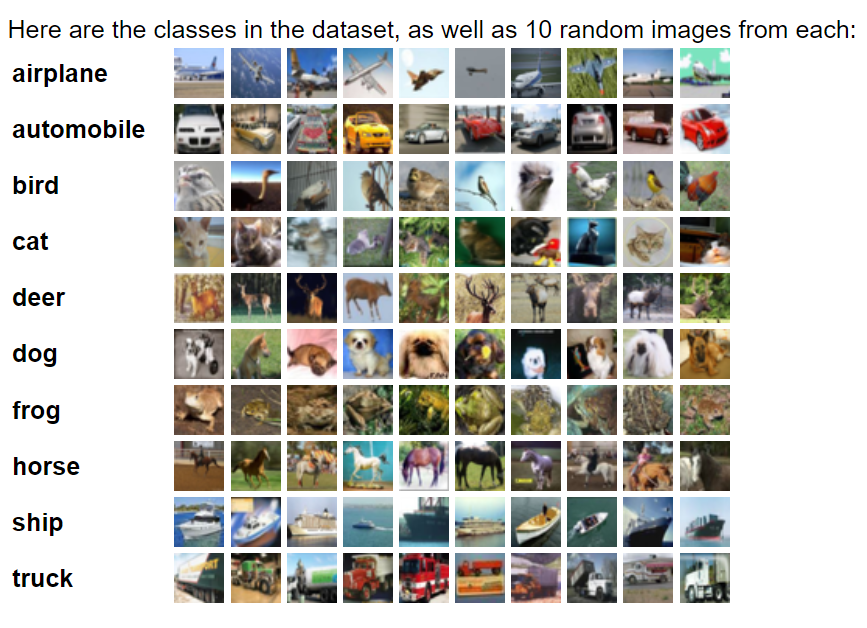

In [ ]:
# Importiamo la libreria TensorFlow, un framework open-source per il machine learning.
import tensorflow as tf
# Imporiamo i moduli datasets, layers, e models dalla sottolibreria keras di TensorFlow.
# datasets viene utilizzato per caricare dataset predefiniti, layers per definire i
# diversi strati della rete neurale, e models per costruire il modello.
from tensorflow.keras import datasets, layers, models
# Importa Matplotlib, una libreria per la creazione di grafici, con l'alias plt.
import matplotlib.pyplot as plt

# Carichiamo il dataset CIFAR-10, che è suddiviso in dati di addestramento e di test.
# train_images e train_labels contengono rispettivamente le immagini e le etichette per
# l'addestramento, mentre test_images e test_labels contengono quelle per il test.
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizza i valori dei pixel delle immagini dividendo per 255.0, scalando così
# i valori nell'intervallo [0, 1].
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Definizione del Modello CNN
# Definiamo il primo layer convoluzionale con 32 filtri, un kernel di dimensione 3x3,
# funzione di attivazione ReLU e una forma di input di 32x32x3 (dimensione delle
# immagini CIFAR-10 con 3 canali colore).
FIRST_LAYER = layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))

# Definiamo un layer di pooling che riduce la dimensione delle feature map usando
# un filtro di dimensione 2x2.
HIDDEN_LAYER_TYPE_1 = layers.MaxPooling2D((2, 2))

# Definiamo un secondo layer convoluzionale con 64 filtri e kernel di dimensione
# 3x3, funzione di attivazione ReLU.
HIDDEN_LAYER_TYPE_2 = layers.Conv2D(64, (3, 3), activation='relu')

# Definiamo un terzo layer di pooling che riduce la dimensione delle feature map
# usando un filtro di dimensione 2x2.
HIDDEN_LAYER_TYPE_3 = layers.MaxPooling2D((2, 2))

# Definiamo un quarto layer convoluzionale con 64 filtri e kernel di dimensione
# 3x3, funzione di attivazione ReLU.
HIDDEN_LAYER_TYPE_4 = layers.Conv2D(64, (3, 3), activation='relu')

# Definiamo un quinto layer denso con 64 neuroni e funzione di attivazione ReLU.
# Questo layer verrà aggiunto dopo la trasformazione delle feature map in un vettore 1D.
HIDDEN_LAYER_TYPE_5 = layers.Dense(64, activation='relu')

# Definiamo il layer finale con 10 neuroni, uno per ciascuna delle 10 classi del dataset CIFAR-10.
# Non viene specificata la funzione di attivazione, quindi sarà utilizzata la funzione
# di attivazione lineare per default cioè la softmax.
LAST_LAYER = layers.Dense(10)

# Costruiamo il modello sequenziale includendo i layer definiti in precedenza.
# Con l'istruzione layers.Flatten() si trasforma le feature map 2D in un vettore 1D
# per l'input al layer denso.
model = models.Sequential([
       FIRST_LAYER,
       HIDDEN_LAYER_TYPE_1,
       HIDDEN_LAYER_TYPE_2,
       HIDDEN_LAYER_TYPE_3,
       HIDDEN_LAYER_TYPE_4,
       layers.Flatten(),
       HIDDEN_LAYER_TYPE_5,
       LAST_LAYER,
])

Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 2.1246 - accuracy: 0.2146 - val_loss: 1.8807 - val_accuracy: 0.3337
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7592 - accuracy: 0.3674 - val_loss: 1.6108 - val_accuracy: 0.4167
Epoch 3/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5311 - accuracy: 0.4475 - val_loss: 1.5379 - val_accuracy: 0.4483
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4019 - accuracy: 0.4980 - val_loss: 1.3274 - val_accuracy: 0.5290
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3146 - accuracy: 0.5310 - val_loss: 1.2870 - val_accuracy: 0.5406
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2460 - accuracy: 0.5589 - val_loss: 1.2504 - val_accuracy: 0.5480
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1805 - accuracy: 0.5827 - val_loss: 1.1486 - val_accuracy:

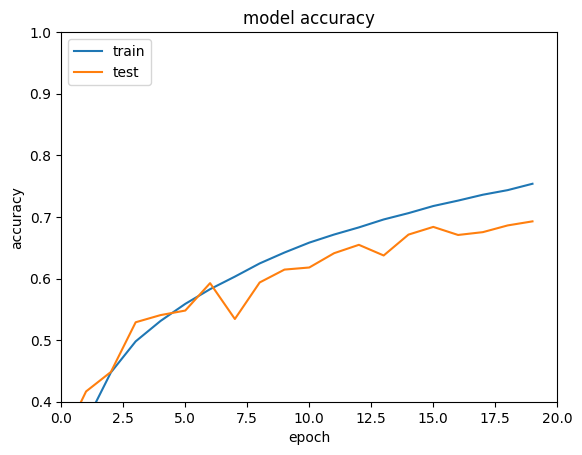

In [ ]:
# Impostiamo la funzione di perdita come SparseCategoricalCrossentropy, adatta per
# problemi di classificazione multi-classe con etichette intere. NUM_EPOCHS è
# il numero di epoche di addestramento (20).
LOSS = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
NUM_EPOCHS = 20 # Puoi provare a modificare questo numero per ottenere una migliore accuratezza

# Compila il modello specificando l'ottimizzatore SGD (Stochastic Gradient Descent),
# la funzione di perdita e la metrica di accuratezza.
model.compile(optimizer='sgd',
              loss=LOSS,
              metrics=['accuracy'])

# La variabile history contiene i dati di addestramento e validazione per ogni epoca.
# Il modello viene addestrato secondo il numero di epoche previste utilizzando
# i dati di addestramento e convalidandoli su quelli di test.
history = model.fit(train_images, train_labels,epochs=NUM_EPOCHS,
                    validation_data=(test_images, test_labels))

# Plotta l'accuratezza del modello durante l'addestramento e la validazione per
# ogni epoca, impostando i limiti degli assi x (epoche) e y (accuratezza).
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()